# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
%pip install matplotlib numpy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.0-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may n

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])  

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)


# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:04<00:00, 38.1MB/s] 


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(image.T)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.99215686].


horse


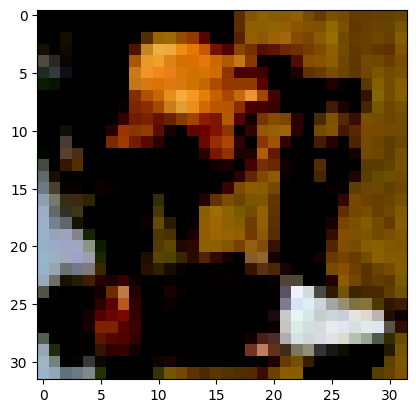

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6392157..0.9607843].


ship


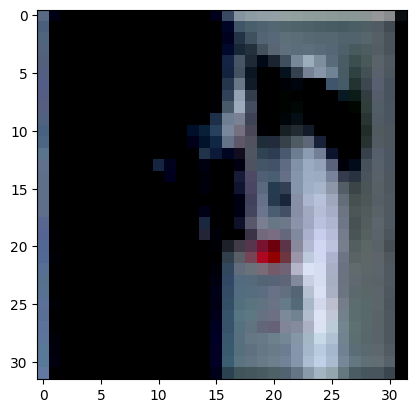

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..1.0].


plane


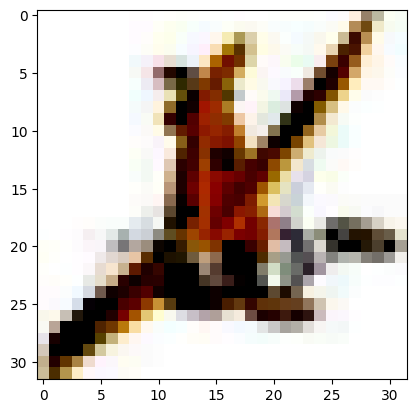

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..1.0].


car


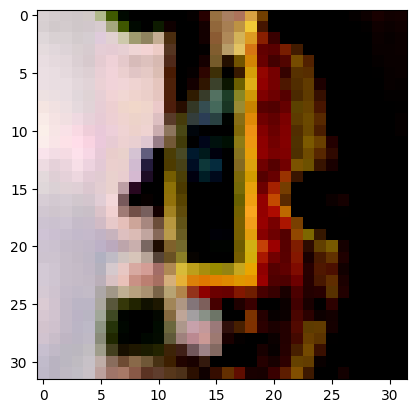

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


car


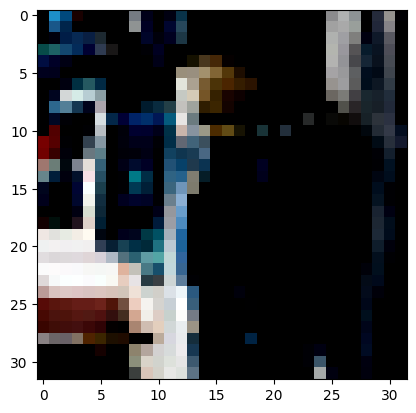

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [9]:
## YOUR CODE HERE ##
# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



## Specify a loss function and an optimizer, and instantiate the model.

## If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##
# Specify device: use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model and move it to the selected device
net = Net().to(device)

# Loss function: CrossEntropyLoss is standard for multi-class classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam is a good default choice for many problems
optimizer = optim.Adam(net.parameters(), lr=1e-3)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
## YOUR CODE HERE ##
num_epochs = 10              # you can start with 5 to test things faster
train_losses = []            # to store average loss per epoch

for epoch in range(num_epochs):
    net.train()              # set the model to training mode (important if using dropout)
    running_loss = 0.0       # accumulate loss over the epoch

    for batch_idx, (inputs, labels) in enumerate(trainloader):
        # Move data to the same device as the model (CPU or GPU)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 1. Zero the parameter gradients from the previous step
        optimizer.zero_grad()

        # 2. Forward pass: compute model outputs
        outputs = net(inputs)

        # 3. Compute loss between outputs and true labels
        loss = criterion(outputs, labels)

        # 4. Backward pass: compute gradients
        loss.backward()

        # 5. Update weights
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Optional: print progress every 250 batches
        if (batch_idx + 1) % 250 == 0:
            avg_so_far = running_loss / (batch_idx + 1)
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Batch [{batch_idx+1}/{len(trainloader)}], "
                  f"Loss: {avg_so_far:.4f}")

    # Compute and store average loss for this epoch
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}")


Epoch [1/10], Batch [250/782], Loss: 1.5865
Epoch [1/10], Batch [500/782], Loss: 1.4278
Epoch [1/10], Batch [750/782], Loss: 1.3308
Epoch [1/10] Average Loss: 1.3202
Epoch [2/10], Batch [250/782], Loss: 0.9815
Epoch [2/10], Batch [500/782], Loss: 0.9681
Epoch [2/10], Batch [750/782], Loss: 0.9496
Epoch [2/10] Average Loss: 0.9470
Epoch [3/10], Batch [250/782], Loss: 0.7877
Epoch [3/10], Batch [500/782], Loss: 0.7802
Epoch [3/10], Batch [750/782], Loss: 0.7774
Epoch [3/10] Average Loss: 0.7766
Epoch [4/10], Batch [250/782], Loss: 0.6310
Epoch [4/10], Batch [500/782], Loss: 0.6367
Epoch [4/10], Batch [750/782], Loss: 0.6451
Epoch [4/10] Average Loss: 0.6453
Epoch [5/10], Batch [250/782], Loss: 0.4991
Epoch [5/10], Batch [500/782], Loss: 0.5135
Epoch [5/10], Batch [750/782], Loss: 0.5211
Epoch [5/10] Average Loss: 0.5237
Epoch [6/10], Batch [250/782], Loss: 0.4165
Epoch [6/10], Batch [500/782], Loss: 0.4182
Epoch [6/10], Batch [750/782], Loss: 0.4249
Epoch [6/10] Average Loss: 0.4254
Epoc

Plot the training loss (and validation loss/accuracy, if recorded).

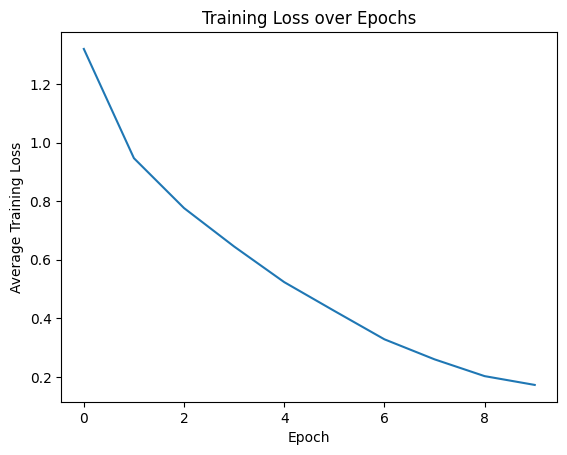

In [14]:
## YOUR CODE HERE ##
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:


net.eval()  # set model to evaluation mode (disables dropout)

correct = 0
total = 0

with torch.no_grad():  # no gradients needed for testing
    for inputs, labels in testloader:
        # Move data to same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)  # shape: [batch_size, 10] (logits)

        # Get the predicted class (highest score = highest probability after softmax)
        _, predicted = torch.max(outputs, dim=1)

        # Update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 73.22%


## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.



In my experiments, the convolutional neural network I built using PyTorch achieved a test accuracy of 73.22% on CIFAR-10, which exceeds Detectocorp’s advertised 70% accuracy on the same benchmark. This is especially notable given that my model is relatively small (two convolutional layers, max pooling, dropout, and two fully connected layers) and was trained from scratch without heavy optimization or large-scale hyperparameter search.

When comparing to the state-of-the-art results reported in the notebook, my model still falls short of cutting-edge architectures, which can achieve significantly higher accuracy on CIFAR-10 using deeper networks, advanced regularization, and large-scale training. However, those state-of-the-art models demonstrate that there is clear headroom for improvement if we continue to invest in building in-house capabilities (for example, by adding data augmentation, using deeper CNNs/ResNets, or applying transfer learning from larger vision models).

Given that:

Our in-house prototype already outperforms Detectocorp’s 70% accuracy on the same benchmark.

The current model is intentionally simple, leaving obvious paths for improvement.

Building in-house gives us full control and flexibility to fine-tune on domain-specific roadside data later (which is critical for self-driving car use cases).

I recommend that the company pursue a “build” strategy rather than buying Detectocorp’s solution. We should continue developing our internal image classification and object detection models, leveraging modern architectures and transfer learning, rather than paying for an external model that already underperforms our initial in-house baseline.
